In [1]:
import xarray as xr

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cartopy.crs as ccrs

# Open the Radio Occultation Temperature Dataset from data.ccca.ac.at

Use xarray to open the remote dataset

In [4]:
ro_temp = xr.open_dataset("https://data.ccca.ac.at/thredds/dodsC/ckan/316/c04/ab-e974-4bca-84fb-ae552fb03b71")

In [5]:
print(ro_temp)

<xarray.Dataset>
Dimensions:             (Latitude: 71, Longitude: 144, Pressure: 102, Time: 3653, nv: 2)
Coordinates:
  * Latitude            (Latitude) float64 -87.5 -85.0 -82.5 -80.0 -77.5 ...
  * Pressure            (Pressure) float64 5.819e+03 5.988e+03 6.162e+03 ...
  * Longitude           (Longitude) float64 -180.0 -177.5 -175.0 -172.5 ...
  * Time                (Time) datetime64[ns] 2006-09-01T12:00:00 ...
Dimensions without coordinates: nv
Data variables:
    Time_bounds         (Time, nv) datetime64[ns] ...
    Longitude_bounds    (Longitude, nv) float64 ...
    Latitude_bounds     (Latitude, nv) float64 ...
    Temperature         (Time, Longitude, Latitude, Pressure) float64 ...
    Temperature__Count  (Time, Longitude, Latitude, Pressure) float32 ...
Attributes:
    _NCProperties:                      version=1|netcdflibversion=4.6.1|hdf5...
    ProcessingCenter:                   WEGC
    Level1bProcessorId:                 OPSv5.6.2
    Level1bProcessingCenter:         

# Plot

Create orthographic plot of one time frame and the 12th pressure level

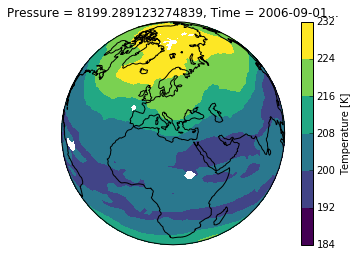

In [6]:
ax = plt.axes(projection=ccrs.Orthographic(20, 35))
ro_temp.Temperature[0,:,:,12].T.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

# Area average 

Reduce area and select pressure level nearest to 850 hPa

In [7]:
bbox = (9.47996951665, 46.4318173285, 16.9796667823, 49.0390742051)

In [8]:
da_ro_temp = ro_temp.Temperature.sel( 
    Latitude=slice(bbox[1],bbox[3]), 
    Longitude=slice(bbox[0],bbox[2])
).sel(Pressure=85000, method='nearest')

Plot time series

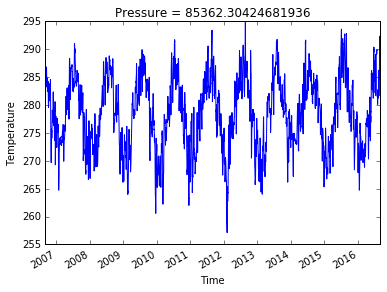

In [9]:
da_ro_temp.mean(dim=('Longitude','Latitude')).plot()